In [2]:
import pandas as pd
import urllib.request
import urllib
import urllib.parse 
import requests

%matplotlib inline
from matplotlib import pylab as plt
from PIL import Image

import urllib
import urllib.request
import urllib.parse
import json
import urllib as urlrequest
from urllib.parse   import quote
from urllib.request import urlopen
import requests

from os.path import join, relpath
from glob import glob
import cv2
import os

In [7]:
cascade_path = "/usr/local/opt/opencv3/share/OpenCV/haarcascades/haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_path)

In [2]:
def reformat_image(file_name, save_name):
    img = Image.open(file_name)
    half_the_width = int(img.size[0] / 2)
    half_the_height =int(img.size[1] / 2)
    min_size = half_the_width
    if min_size > half_the_height:
        min_size = half_the_height

    half_mini_size = int(min_size)

    img = img.crop(
        (
            half_the_width - half_mini_size,
            half_the_height - half_mini_size,
            half_the_width + half_mini_size,
            half_the_height + half_mini_size
        )
    )
    img = img.resize((64,64))
    img.save(save_name)
    plt.imshow( img )

In [3]:


def download_image(text):
    url = 'https://api.flickr.com/services/rest/'
    API_KEY = ""

    payload = {
        'method': 'flickr.photos.search',
        'api_key': API_KEY,
#         'text': text,
        'tags': text,
        'per_page': '50',
        'format': 'json',
        'nojsoncallback': '1',
        'privacy_filter' : '1',
        'content_type': '1',
        }

    r = requests.get(url, params=urllib.parse.urlencode(payload))

    resp = r.json()
    tpl_url = 'https://farm%s.staticflickr.com/%s/%s_%s.jpg'
    count = 1
    for i in resp['photos']['photo']:
        img_url = tpl_url % (i['farm'],i['server'],i['id'],i['secret'])
        r = requests.get(img_url)
        fname = "downloaded_image/"+text+"_%04d.jpg" % count
        f = open(fname, 'wb')
        f.write(r.content)
        f.close()

        count += 1

In [41]:
download_image("綾瀬はるか")

In [46]:
celebrity_names = [
    "ベッキー",
    "石原さとみ",
    "新垣結衣",
    "ローラ",
    "佐藤ひなこ",
#     "有村架純",
#     "広瀬すず",
    "前田敦子",
    "大島優子",
#     "山本彩",
    "深田恭子",
]

In [40]:
for name in celebrity_names:
    download_image(name)

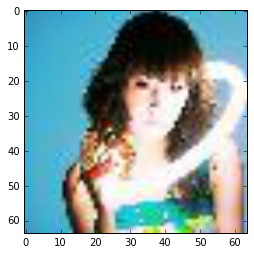

In [70]:
path = 'img/downloaded_image'
files = [relpath(x, path) for x in glob(join(path, '*'))]
for file in files:
    reformat_image(path+"/"+file, "img/square_image/"+file)

# Google Searchにする

In [42]:
# reffer to http://qiita.com/satoshi03/items/ae616dc080d085604b06

CUSTOM_SEARCH_API_KEY = ""
CUSTOM_ENGINE_ID = ""
URL = "https://www.googleapis.com/customsearch/v1"


def get_image_urls(search_word, page=0):
    """
    GOOGLE CUSTOM SEARCH APIからキーワードで画像のURLを取得する
    """
    payload = {
        'key': CUSTOM_SEARCH_API_KEY,
        'cx': CUSTOM_ENGINE_ID,
        'searchType': 'image',
        'imgType': 'face',
        'q': search_word,
        'start': page*10 + 1
        }

    r = requests.get(URL, params=urllib.parse.urlencode(payload))
    resp = r.json()

    if "items" not in resp:
        return []

    links = []
    for item in resp["items"]:
        links.append(item["link"])
    return links

In [43]:
links = []
for i in range(1, 10):
    links.extend(get_image_urls("綾瀬はるか", i))

In [44]:
text = "綾瀬はるか"
count = 1
for link in links:
    r = requests.get(link)
    fname = "img/google_image/g_"+text+"_%04d.jpg" % count
    f = open(fname, 'wb')
    f.write(r.content)
    f.close()
    count +=1

In [61]:
celebrity_names = [
   " 綾瀬はるか",
#     "ベッキー",
#     "石原さとみ",
#     "新垣結衣",
#     "ローラ",
#     "佐藤ひなこ",
#     "有村架純",
#     "広瀬すず",
#     "前田敦子",
#     "大島優子",
#     "山本彩",
#     "深田恭子",
#     '一般人',
]

start = 11
for name in celebrity_names:
    count = start*10
    for i in range(start, start+10):
        links = get_image_urls(name, i)
        for link in links:
            r = requests.get(link)
            fname = "img/google_image/g_"+name+"_%04d.jpg" % count
            f = open(fname, 'wb')
            f.write(r.content)
            f.close()
            count +=1

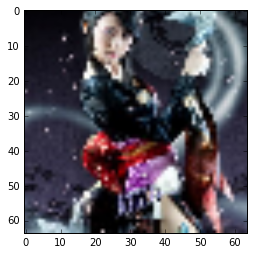

In [59]:
path = 'img/google_image'
files = [relpath(x, path) for x in glob(join(path, 'g_*'))]
for file in files:
    try:
        reformat_image(path+"/"+file, "img/square_image_64/"+file)    
    except:
        pass

# 画像を変換する


In [3]:
path = 'img/square_face_image_r_64'
files = [relpath(x, path) for x in glob(join(path, 'g_*'))]
for file in files:
    os.system("python img/increase_picture.py "+ file)
    break

In [66]:
os.system("python img/increase_picture.py square_image_64/g_綾瀬はるか_0001.jpg")

256

# 顔だけ取り出す

In [26]:
def face_rect(image_path):
    facerect = []
    try:
        image = cv2.imread(image_path)
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        facerect = cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=1, minSize=(1, 1))
    except:
        pass
    return facerect

In [54]:
path = 'img/downloaded_image'
files = [relpath(x, path) for x in glob(join(path, '*'))]
for file in files:
    count = 0
    file_name = join(path,file)
    try:
        img = Image.open(file_name)
        for rect in  face_rect(file_name):
            if rect[2] > 32:
                img_face = img.crop((
                        rect[0],
                        rect[1],
                        rect[0]+rect[2],
                        rect[1]+rect[3],
                    ))
                img_face.thumbnail((64,64), Image.ANTIALIAS)
                try:
                    if count == 0:
                        img_face.save("img/square_f_face_image_64/"+file)
                    else:
                        img_face.save("img/square_f_face_image_64/"+str(count)+"_"+file)
                except:
                    pass
                count +=1
    except:
        pass

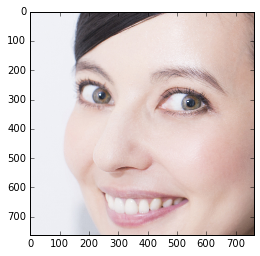

In [47]:
img = Image.open("img/google_image/g_ベッキー_0003.jpg")
rect = [1096,418 ,762 ,762]
img = img.crop((
                    rect[0],
                    rect[1],
                    rect[0]+rect[2],
                    rect[1]+rect[3],
                ))
plt.imshow(img)